# Log Linear Fit

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import utils

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20)

from numpy.polynomial import Polynomial, Chebyshev

## Parameters

In [2]:
base = "ccs"
experiment = "fista"

In [3]:
fista_params = utils.quality_filter(base, experiment, eps=None, verbose=True)
eps = np.load(f"results/{base}/{experiment}_%3.2fx10^%d/err.npy" % fista_params)[1, -1] + 2
print(eps)

Selected best reconstruction parameters.
15.613694906234741


In [4]:
loc = f"results/{base}/{experiment}"
(params, _) = utils.quality_filter(base, experiment, eps=eps)
print(params)

Selected 4 of 15.
[(1.73, -4), (1.15, -4), (7.7, -5), (5.13, -5)]


## Plot

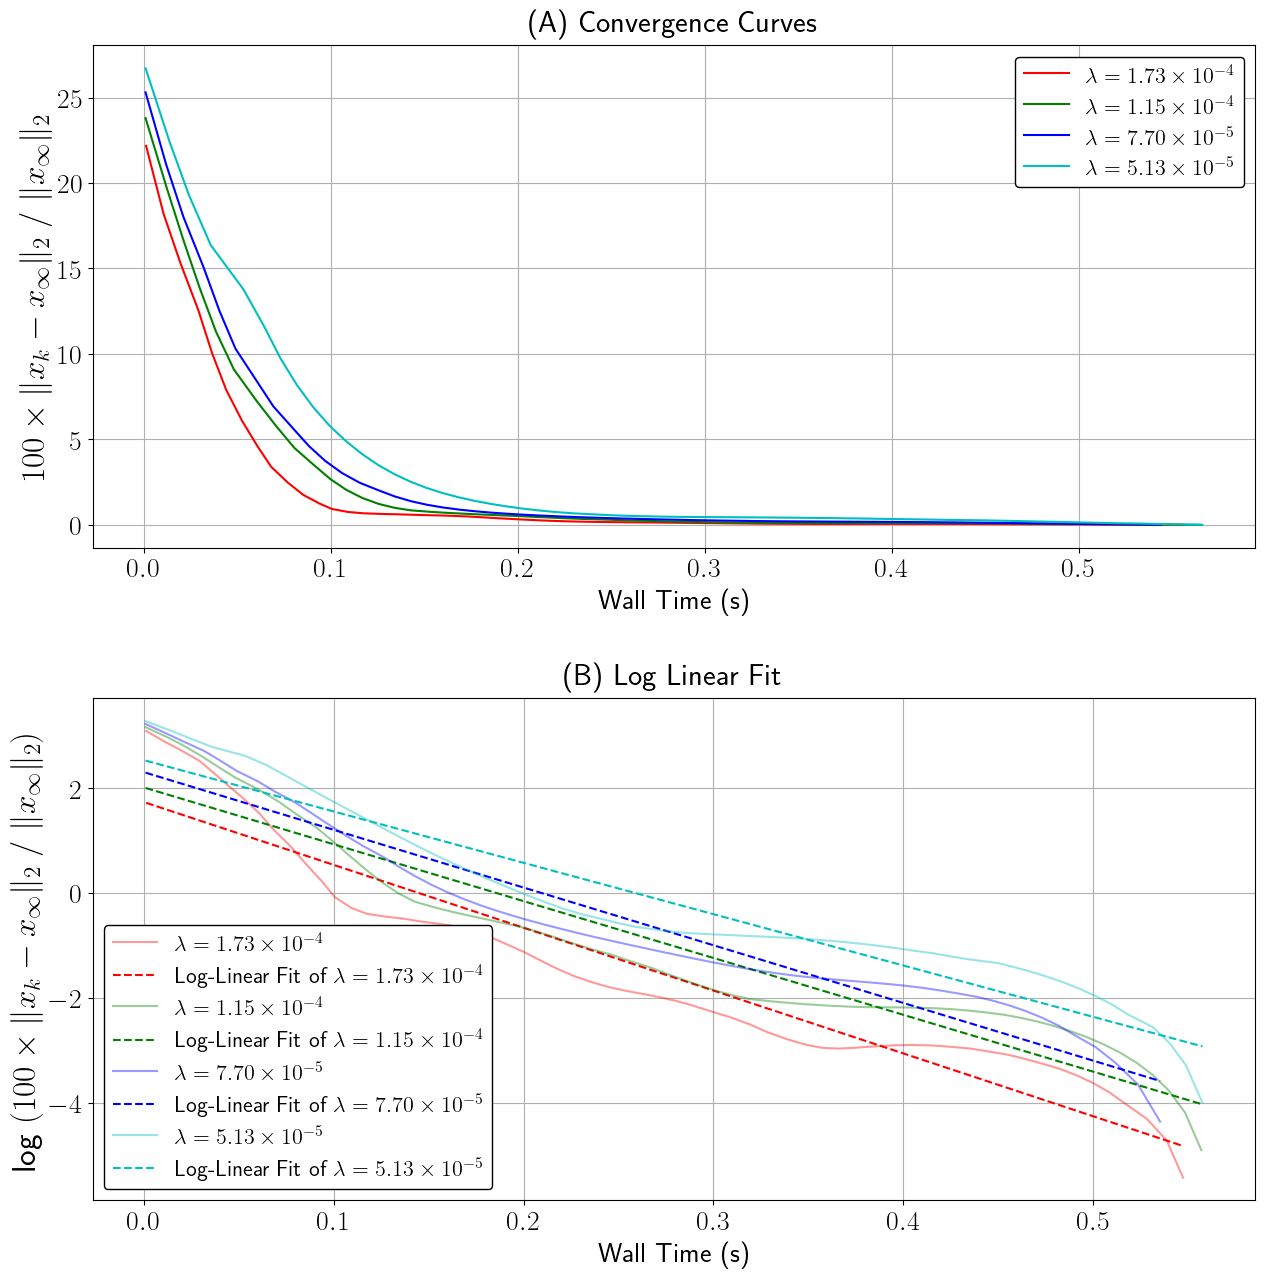

In [5]:
(fig, axs) = plt.subplots(2, 1, figsize=(15, 15), dpi=100)

colors = ["r", "g", "b", "c"]
legend = []

k = 0
for elm in params:
    src = loc + "_%3.2fx10^%d/" % elm
    
    conv = utils.calc_conv(src)
    time = np.load(f"{src}/time.npy")

    c = Chebyshev.fit(time[:-1], np.log(conv[:-1]), deg=1)
    c = c.convert(kind=Polynomial).coef
    
    axs[0].plot(time, conv, color=colors[k], linestyle="-")
    axs[1].plot(time[:-1], np.log(conv[:-1]), color=colors[k], linestyle="-", alpha=0.4)
    
    axs[1].plot(time[:-1], c[0] + c[1] * time[:-1], color=colors[k], linestyle="dashed")
    legend.append("$\lambda = %3.2f\\times10^{%d}$" % elm)
    k += 1

axs[0].set_ylabel("$100 \\times \lVert x_k - x_\infty \\rVert_2 \;/\; \lVert x_\infty \\rVert_2$", fontsize=24)
axs[1].set_ylabel("log $\left(100 \\times \lVert x_k - x_\infty \\rVert_2 \;/\; \lVert x_\infty \\rVert_2\\right)$", fontsize=24)

axs[0].legend(legend, ncol=1, fontsize=16, loc="upper right", framealpha=1, edgecolor="black")
new_legend = [None]*(2 * len(legend))
new_legend[0::2] = legend
new_legend[1::2] = [r"Log-Linear Fit of %s" % elm for elm in legend]
axs[1].legend(new_legend, ncol=1, fontsize=16, loc="lower left", framealpha=1, edgecolor="black")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
axs[0].set_title("(A) Convergence Curves", fontsize=22, y=1.01)
axs[1].set_title("(B) Log Linear Fit", fontsize=22, y=1.01)

for ax in axs.ravel():
    ax.grid()
    ax.set_xlabel("Wall Time (s)", fontsize=20)

## Done.